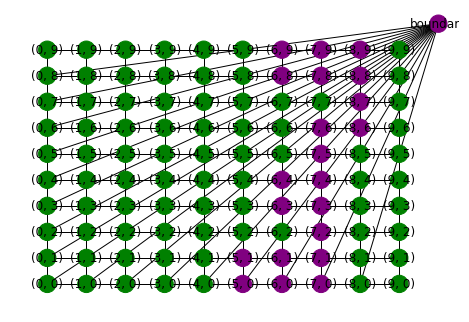

In [172]:
'''This script is meant to perform random walk partitioning from a boundary

Authors: Bryce McLaughlin and Amara Jaeger

The general idea is that we begin at the boundary of a state (represented by a super node)
and perform a random walk until we reintersect our path, which may be on the boundary.
At the point of reintersection we create a cycle, which will be used to partition the graph
into multiple parts.

Implementation (for k=2):
-Augment Shapefile to include an outerface/district which touches all boundary districts
-Create [Adjacency Matrix for] dual graph (later: weighted probability of edges to adjust probability distribution)
-Create a random walk of districts and assign them all to partition group 2
-Randomly selected a node which is not one of these and use a BFS to create partition 1 around this district
-Assign all other districts to partition 2 (this guarantees that we will have two connected partitions)
'''

import networkx as nx #for graph datatypes and such
import geopandas as gpd #for shapfile reading
import matplotlib.pyplot as plt #general visualizations
import random
import queue as q

#Temporary graph for testing
G = nx.grid_graph(dim = [10,10])
G.add_node("boundary")
for i in range(0,9):
    for j in range(0,9):
        if i == 0 or j == 0:
            G.add_edge('boundary', (i,j))
        if i == 9 or j == 9:
            G.add_edge('boundary', (i,j))

visited = []
current = 'boundary'
color_map = []
last = None
while current not in visited:
    plt.close
    visited.append(current)
    neighbors = list(G.neighbors(current))
    newnode = last
    while newnode == last:
        index = random.randrange(0,len(neighbors))
        newnode = neighbors[index]
    last = current
    current = newnode 
    if current == 'boundary':
        break
for node in G:
    if node in visited:
        color_map.append('purple')
    else:
        color_map.append('green')

pos = dict([(n,n) for n in G.nodes])
pos['boundary'] = (10, 10)
nx.draw(G, node_color = color_map,with_labels = True,pos=pos)



[DISTRICT 1: [(6, 5), (5, 5), (6, 6), (4, 5), (5, 4), (5, 6), (6, 7), (3, 5), (4, 4), (4, 6), (5, 3), (5, 7), (7, 7), (2, 5), (3, 4), (3, 6), (4, 3), (4, 7), (5, 2), (5, 8), (1, 5), (2, 4), (2, 6), (3, 3), (3, 7), (4, 2), (4, 8), (6, 2), (5, 9), (0, 5), (1, 4), (1, 6), (2, 3), (2, 7), (3, 2), (3, 8), (4, 1), (4, 9), (0, 4), (0, 6), (1, 3), (1, 7), (2, 2), (2, 8), (3, 1), (3, 9), (4, 0), (0, 3), (0, 7), (1, 2), (1, 8), (2, 1), (2, 9), (3, 0), (0, 2), (0, 8), (1, 1), (1, 9), (2, 0), (0, 1), (0, 9), (1, 0), (0, 0)] 
 DISTRICT 2 [(5, 0), (5, 1), (6, 0), (6, 1), (6, 3), (6, 4), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
Equality score (0-100) = 74


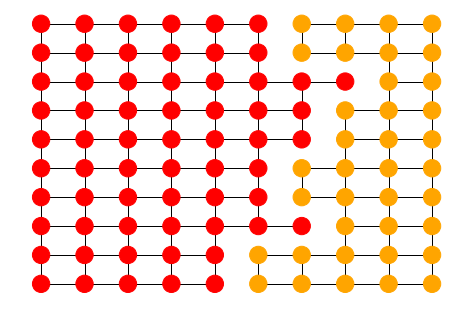

In [173]:
start = 'boundary'
while start in visited:
   start = random.choice(list(G.nodes))
partition_1 = []
bfs_queue = q.Queue()
bfs_queue.put(start)
bfs_color = []

#Populate the first partition using a BFS model
while not bfs_queue.empty():
   node = bfs_queue.get()
   partition_1.append(node)
   for nbr in list(G.neighbors(node)):
       if nbr not in partition_1 and nbr not in visited and nbr not in list(bfs_queue.queue):
           bfs_queue.put(nbr)

###Allocate Partition 2 and output LoL for partitioning.
partition_2 = []
for other in list(G.nodes):
   if other not in partition_1 and other != 'boundary':
       partition_2.append(other)
print('[DISTRICT 1:', partition_1, '\n', 'DISTRICT 2',partition_2)

G.remove_node('boundary')

for node in G:
    if node in partition_1:
        bfs_color.append('red')
    else:
        bfs_color.append('orange')
        
##experimental: remove edges between partitions
for node in partition_2:
    for nbr in list(G.neighbors(node)):
        if nbr in partition_1:
            G.remove_edge(node,nbr)
        
pos = dict([(n,n) for n in G.nodes])
nx.draw(G, node_color = bfs_color, pos=pos)